In [1]:
# Created by Micael Veríssimo: micaelvero@hotmail.com
# Created by Isabella Ferreira: is_bella21@hotmail.com

import ROOT
import copy
#from NeuralNetwork import MultiLayerPerceptron as mlp
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes


ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

canvas <ROOT.TPad object ("c1_1") at 0x6db6b70>
canvas <ROOT.TPad object ("c1_2") at 0x6d9c6e0>
canvas <ROOT.TPad object ("c1_3") at 0x6d9ca40>


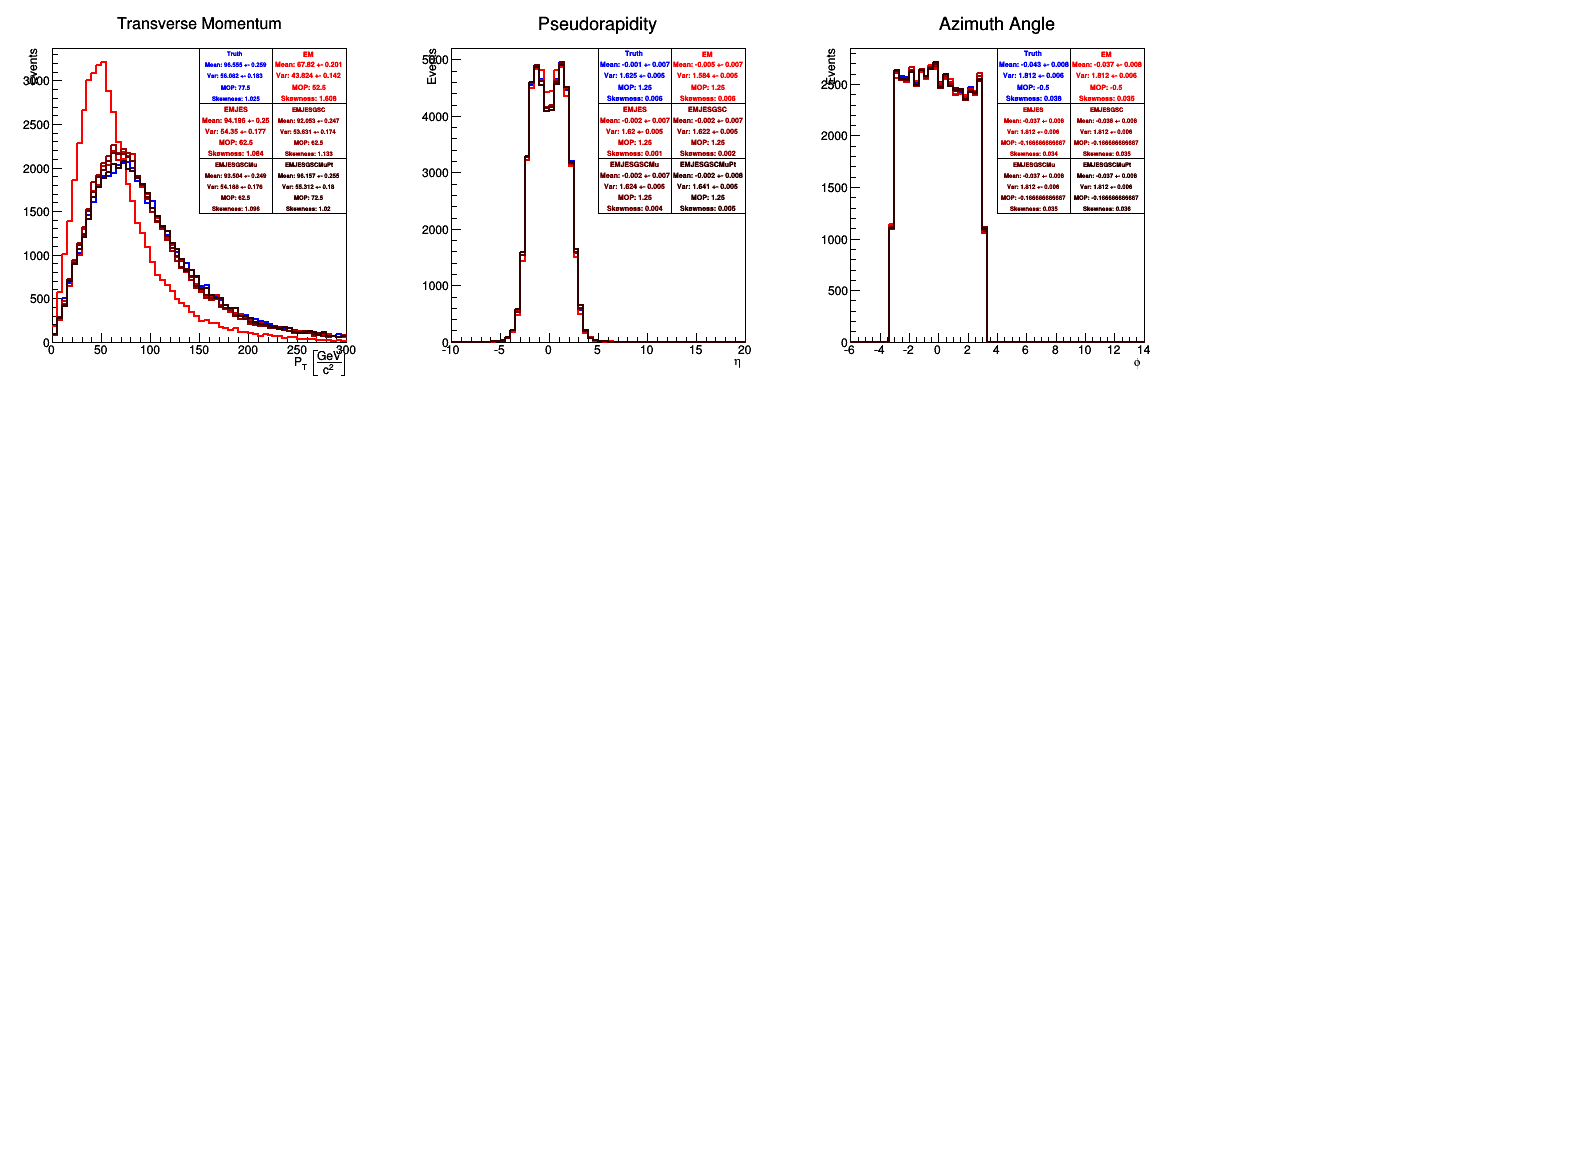

In [2]:



output = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results"

data_input = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet/lvbb125.root"
treeName = "perevent"

file = ROOT.TFile(data_input,"READ")
tree = file.Get(treeName)

nrEvents = (tree.GetEntries())/2

# for histograms
bins = 60
m_max = 300
m_min = 0

ylabel = "Occurrences"

# Use Colors
list_color = []
list_color.append(ROOT.kBlue) # For truth
list_color.append(ROOT.kRed) 
list_color.append(ROOT.kRed+1)
list_color.append(ROOT.kRed+2)
list_color.append(ROOT.kRed+3)
list_color.append(ROOT.kRed+4)
#end list of colors

#  Make a list of pt histogram
list_inf_pt = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth","h_pt_truth",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EM","h_pt_EM",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJES","h_pt_EMJES",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSC","h_pt_EMJESGSC",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSCMu","h_pt_EMJESGSCMu",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSCMuPt","h_pt_EMJESGSCMuPt",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

list_hist_pt = HistogramFunctions.CreateListOf1DHistograms(list_inf_pt,list_color)
# end

# Make a list of Eta histogram
m_min = -10
m_max = 20
list_inf_eta = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth","h_Eta_truth",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EM","h_Eta_EM",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJES","h_Eta_EMJES",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSC","h_Eta_EMJESGSC",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSCMu","h_Eta_EMJESGSCMu",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSCMuPt","h_Eta_EMJESGSCMuPt",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

list_hist_eta = HistogramFunctions.CreateListOf1DHistograms(list_inf_eta,list_color)
# end

# Make a list of Phi Histogram
m_min = -6
m_max = 14
list_inf_phi = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth","h_Phi_truth",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EM","h_Phi_EM",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJES","h_Phi_EMJES",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSC","h_Phi_EMJESGSC",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSCMu","h_Phi_EMJESGSCMu",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSCMuPt","h_Phi_EMJESGSCMuPt",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

list_hist_phi = HistogramFunctions.CreateListOf1DHistograms(list_inf_phi,list_color)
# end


# read tree and fill the histograms
for (i,entry) in enumerate(tree):
    if nrEvents>0:
        if i>nrEvents:
            break
    # variables for j1.     
    #E1 = tree.j1_GENWZ_E
    #Eta1 = tree.j1_GENWZ_Eta
    #Phi1 = tree.j1_GENWZ_Phi
    #Pt1 = tree.j1_GENWZ_Pt
    
    #Theta1 = AuxiliarFunctions.theta(Eta1)
    #Comp1 = AuxiliarFunctions.Componets(E1,Eta1,Phi1,Theta1)
    #norm1 = AuxiliarFunctions.norm(Comp1)
    
    # variables for j2.     
    #E2 = tree.j2_GENWZ_E
    #Eta2 = tree.j2_GENWZ_Eta
    #Phi2 = tree.j2_GENWZ_Phi
    #Pt2 = tree.j2_GENWZ_Pt
    
    #Theta2 = AuxiliarFunctions.theta(Eta2)
    #Comp2 = AuxiliarFunctions.Componets(E2,Eta2,Phi2,Theta2)
    #norm2 = AuxiliarFunctions.norm(Comp2)
    
    # sum of components.
    #Comp3 = AuxiliarFunctions.somaComponents(Comp1,Comp2)
    #norm3 = AuxiliarFunctions.norm(Comp3)
    #numerador1 = AuxiliarFunctions.numerador(Comp1,Comp3)
    
    #angle1 = AuxiliarFunctions.alpha(numerador1,norm1,norm3)
    
    #compute Relative Pt
    #ptrel_j1 = AuxiliarFunctions.PtRelative(E1,angle1)
    
    # fill the histograms of Pt
    list_hist_pt[0].Fill(tree.j1j2_GENWZ_Pt)
    list_hist_pt[1].Fill(tree.j1j2_EM_Pt)
    list_hist_pt[2].Fill(tree.j1j2_EMJES_Pt)
    list_hist_pt[3].Fill(tree.j1j2_EMJESGSC_Pt)
    list_hist_pt[4].Fill(tree.j1j2_EMJESGSCMu_Pt)
    list_hist_pt[5].Fill(tree.j1j2_EMJESGSCMuPt_Pt)
    # fill the histograms of Eta
    list_hist_eta[0].Fill(tree.j1j2_GENWZ_Eta)
    list_hist_eta[1].Fill(tree.j1j2_EM_Eta)
    list_hist_eta[2].Fill(tree.j1j2_EMJES_Eta)
    list_hist_eta[3].Fill(tree.j1j2_EMJESGSC_Eta)
    list_hist_eta[4].Fill(tree.j1j2_EMJESGSCMu_Eta)
    list_hist_eta[5].Fill(tree.j1j2_EMJESGSCMuPt_Eta)
    # fill the histogram of Phi
    list_hist_phi[0].Fill(tree.j1j2_GENWZ_Phi)
    list_hist_phi[1].Fill(tree.j1j2_EM_Phi)
    list_hist_phi[2].Fill(tree.j1j2_EMJES_Phi)
    list_hist_phi[3].Fill(tree.j1j2_EMJESGSC_Phi)
    list_hist_phi[4].Fill(tree.j1j2_EMJESGSCMu_Phi)
    list_hist_phi[5].Fill(tree.j1j2_EMJESGSCMuPt_Phi)
    
    
# make clone lists for draw all histograms in subcanvas
clone_list_pt = []
for hist in list_hist_pt:
    newhist = hist.Clone()
    clone_list_pt.append(newhist)  
    
clone_list_eta = []
for hist in list_hist_eta:
    newhist = hist.Clone()
    clone_list_eta.append(newhist)  
    
clone_list_phi = []
for hist in list_hist_phi:
    newhist = hist.Clone()
    clone_list_phi.append(newhist)

# Draw histograms

HistogramFunctions.Draw1DHists(list_hist_pt,output)
HistogramFunctions.Draw1DHists(list_hist_eta,output)
HistogramFunctions.Draw1DHists(list_hist_phi,output)

c1 = rootnotes.canvas("c1", (1600, 1200))

c1.Divide(4,3)
a = c1.cd(1)
b = c1.cd(2)
c = c1.cd(3)
d = c1.cd(4)

HistogramFunctions.DrawList1DHistInCanvas(clone_list_pt, "Transverse Momentum", "P_{T} #left[#frac{GeV}{c^{2}}#right]", "Events", a)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_eta, "Pseudorapidity", " #eta ", "Events", b)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_phi, "Azimuth Angle", " #phi ", "Events", c)
c1.Print(output+"/"+"AllLevels.pdf")
c1